In [1]:
import math

In [2]:
# Example Dataset
# Let's say we have a dataset with two classes, A and B
# Suppose in a dataset of 10 elements, 4 are of class A and 6 are of class B

# Number of elements in each class
n_A = 4
n_B = 6
total = n_A + n_B

In [3]:
# let's calculate the proportions
p_A = n_A / total
p_B = n_B / total

# print the proportions
print("Proportion of A: ", p_A)
print("Proportion of B: ", p_B)

Proportion of A:  0.4
Proportion of B:  0.6


In [4]:
# Entropy Calculate
# Entropy is a measure of uncertainty
entropy = -p_A * math.log2(p_A) - p_B * math.log2(p_B)
print("Entropy: ", entropy)

Entropy:  0.9709505944546686


In [5]:
# gini impurity
# Gini impurity is a measure of misclassification
gini = 1- p_A**2 - p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [6]:

# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3
# calculate the proportion

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


---
Decision Tree Regresser

In [5]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns


In [6]:
df=sns.load_dataset('titanic')

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# remove deck column
df.drop('deck',axis=1,inplace=True)


In [10]:
# impute the missing values using simple imputer (strategy=median)
imputer=SimpleImputer(strategy='median')
df[['age','fare']]=imputer.fit_transform(df[['age','fare']])


In [11]:
# impute the missing values in embarked and embark_town
imputer=SimpleImputer(strategy='most_frequent')
df[['embarked','embark_town']]=imputer.fit_transform(df[['embarked','embark_town']])

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [19]:
#label encode the category and object columns
le=LabelEncoder()
for cols in df.columns:
    if df[cols].dtype=='category' or df[cols].dtype=='object':
        df[cols]=le.fit_transform(df[cols])
(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [23]:
# split the data into X and y
X=df.drop(['survived','alive'],axis=1)
y=df['survived']


In [24]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
# predict the model
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 23]
 [21 53]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



TypeError: 'str' object is not callable

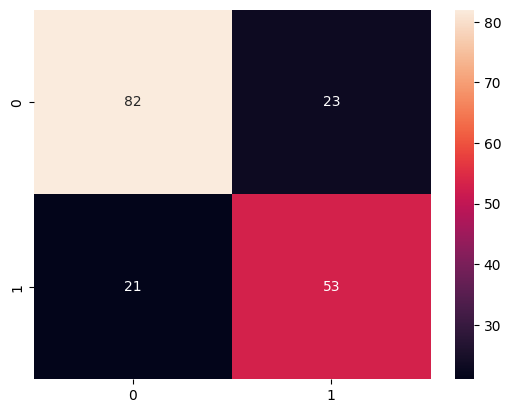

<Figure size 1000x800 with 0 Axes>

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(10,8))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
# save the model
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='./saved_model/Decision_tree.dot', feature_names=X.columns, filled=True, rounded=True)